# Работа с таблицами

In [1]:
# Создание таблицы использую примитивы Python
ar = [[1, 2], [3, 4]]
ar

[[1, 2], [3, 4]]

In [2]:
for i in range(len(ar)):
    print(ar[i])

[1, 2]
[3, 4]


In [3]:
for i in range(len(ar)):
    for j in range(len(ar[i])):
        print(ar[i][j])

1
2
3
4


# Pandas

In [4]:
# Обращение к системному пакетному менеджеру
# установка модуля pandas, флаг -q - тихая установка  
%pip install -q pandas
import pandas as pd

Note: you may need to restart the kernel to use updated packages.


In [5]:
sr = pd.Series([4, 5, 6.0]) # Создание одномерного массива
sr

0    4.0
1    5.0
2    6.0
dtype: float64

In [6]:
sr.sum() # получение суммы всех элементов, идентично sum(sr)

15.0

In [7]:
sr[0] # получение значения по идентификатору

4.0

# Dataframe

In [8]:
pd.DataFrame([[1, 2, 3], [4, 5, 6]]) # Создание таблицы

,0,1,2
0,1,2,3
1,4,5,6


In [9]:
df = pd.DataFrame([[1, 2, 3], [4, 5, 6]], columns=['id', '1', 'b']) # Создание таблицы с именами стобцов
df

,id,1,b
0,1,2,3
1,4,5,6


In [10]:
df['id'] # Получение значений столбца

0    1
1    4
Name: id, dtype: int64

In [11]:
df[['id', '1']] # Получение значений по столбцам

,id,1
0,1,2
1,4,5


In [12]:
df[['id', 'b']].loc[1] # Получение значений по столбцам и строкам

id    4
b     6
Name: 1, dtype: int64

In [13]:
df = pd.DataFrame([[1, 2, 3], [5, 40, 220]], 
                  columns=['пешеход', 'авто', 'спорткар'], 
                  index=['время', 'скорость']) # Создание таблицы с другими идентификаторами
df

,пешеход,авто,спорткар
время,1,2,3
скорость,5,40,220


In [14]:
df.loc['скорость']

пешеход       5
авто         40
спорткар    220
Name: скорость, dtype: int64

In [15]:
df.info() # Получение информации о таблице

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, время to скорость
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   пешеход   2 non-null      int64
 1   авто      2 non-null      int64
 2   спорткар  2 non-null      int64
dtypes: int64(3)
memory usage: 172.0+ bytes


In [16]:
df.transpose() # Транспонирование (поворот - столбцы -> индексы, индексы -> столбцы) таблицы(матрицы)

,время,скорость
пешеход,1,5
авто,2,40
спорткар,3,220


In [17]:
# Создание таблицы из словарей
df = pd.DataFrame([{'id': 1, 'a': 2, 'b': 3}, {'id': 4, 'a': 5, 'b': 6}])
df

,id,a,b
0,1,2,3
1,4,5,6


In [18]:
# Создание таблицы из словарей с различными ключами, NaN - Not a Number
df = pd.DataFrame([{'id': 1, 'a': 2, 'b': 3}, {'id': 4, 'a': 5, 'c': 6}])
df

,id,a,b,c
0,1,2,3.0,NaN
1,4,5,NaN,6.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      2 non-null      int64  
 1   a       2 non-null      int64  
 2   b       1 non-null      float64
 3   c       1 non-null      float64
dtypes: float64(2), int64(2)
memory usage: 192.0 bytes


# Rename axis

In [20]:
df = pd.DataFrame([{'id': 1, 'Название': 2}, 
                   {'id': 3, 'Название': 4, 'Стоимость': 4},
                   {'id': 5, 'Название': 6, 'Стоимость': 7},
                   {'id': 8, 'Название': 9, 'Стоимость': 10}])
df

,id,Название,Стоимость
0,1,2,NaN
1,3,4,4.0
2,5,6,7.0
3,8,9,10.0


In [21]:
df.rename({'Название': 'name', 'Стоимость': 'price'}, axis=1) # Переименование столбца

,id,name,price
0,1,2,NaN
1,3,4,4.0
2,5,6,7.0
3,8,9,10.0


In [22]:
df.rename({0: 'a'}, axis=0) # Переименование индекса

,id,Название,Стоимость
a,1,2,NaN
1,3,4,4.0
2,5,6,7.0
3,8,9,10.0


# Set index

In [23]:
df.set_index('id') # Использование столбца как идентификатор

,Название,Стоимость
id,,
1,2,NaN
3,4,4.0
5,6,7.0
8,9,10.0


In [24]:
df.set_index(['id', 'Название']) # Использование композитного идентификатора

,,Стоимость
id,Название,
1,2,NaN
3,4,4.0
5,6,7.0
8,9,10.0


# Statistics

In [25]:
df = pd.DataFrame([{'id': 1, 'b': 2}, 
                   {'id': 3, 'a': 4},
                   {'id': 5, 'a': 6, 'b': 7},
                   {'id': 8, 'a': 9, 'b': 10}])
df

,id,b,a
0,1,2.0,NaN
1,3,NaN,4.0
2,5,7.0,6.0
3,8,10.0,9.0


In [26]:
df.sum()

id    17.0
b     19.0
a     19.0
dtype: float64

In [27]:
df['b'].sum()

19.0

In [28]:
df.mean()

id    4.250000
b     6.333333
a     6.333333
dtype: float64

In [29]:
df.count()

id    4
b     3
a     3
dtype: int64

In [30]:
df.median()

id    4.0
b     7.0
a     6.0
dtype: float64

In [31]:
df.max()

id     8.0
b     10.0
a      9.0
dtype: float64

In [32]:
df['b'].max()

10.0

In [33]:
df.min()

id    1.0
b     2.0
a     4.0
dtype: float64

In [34]:
df.mode()

,id,b,a
0,1,2.0,4.0
1,3,7.0,6.0
2,5,10.0,9.0
3,8,NaN,NaN


In [35]:
df['a'].mode()

0    4.0
1    6.0
2    9.0
Name: a, dtype: float64

In [36]:
pd.DataFrame([{'a': 4, 'b': 2}, 
                   {'a': 4},
                   {'a': 6, 'b': 7},
                   {'a': 9, 'b': 10}]).mode()

,a,b
0,4.0,2.0
1,NaN,7.0
2,NaN,10.0


In [37]:
pd.DataFrame([{'a': 4, 'b': 2}, 
                   {'a': 4},
                   {'a': 6, 'b': 7},
                   {'a': 9, 'b': 10}])['a'].mode()

0    4
Name: a, dtype: int64

# Work with NaN

In [38]:
df = pd.DataFrame([{'id': 1, 'b': 2}, 
                   {'id': 3, 'a': 4},
                   {'id': 5, 'a': 6, 'b': 7},
                   {'id': 8, 'a': 9, 'b': 11}])
df

,id,b,a
0,1,2.0,NaN
1,3,NaN,4.0
2,5,7.0,6.0
3,8,11.0,9.0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      4 non-null      int64  
 1   b       3 non-null      float64
 2   a       3 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 224.0 bytes


In [40]:
df.notna() # Преобразоватние таблицы, где NaN будет False, остальное - True

,id,b,a
0,True,True,False
1,True,False,True
2,True,True,True
3,True,True,True


In [41]:
df.isna() # Преобразоватние таблицы, обратное notna

,id,b,a
0,False,False,True
1,False,True,False
2,False,False,False
3,False,False,False


In [42]:
df.notna().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      4 non-null      bool 
 1   b       4 non-null      bool 
 2   a       4 non-null      bool 
dtypes: bool(3)
memory usage: 140.0 bytes


In [43]:
df['b'].notna()

0     True
1    False
2     True
3     True
Name: b, dtype: bool

In [44]:
df.fillna(0) # Заполнить все NaN на 0

,id,b,a
0,1,2.0,0.0
1,3,0.0,4.0
2,5,7.0,6.0
3,8,11.0,9.0


In [45]:
df.fillna(df['b'].mean()) # Заполнить все NaN средним значением из столбца b, но NaN в столбце a тоже изменятся 

,id,b,a
0,1,2.000000,6.666667
1,3,6.666667,4.000000
2,5,7.000000,6.000000
3,8,11.000000,9.000000


In [46]:
df['b'] = df['b'].fillna(df['b'].mean()) # Заполнить средним значением b, все NaN в столбце b, но данный столбец будет перезаписан
df

,id,b,a
0,1,2.000000,NaN
1,3,6.666667,4.0
2,5,7.000000,6.0
3,8,11.000000,9.0


In [47]:
df = pd.DataFrame([{'id': 1, 'b': 2}, 
                   {'id': 3, 'a': 4},
                   {'id': 5, 'a': 6, 'b': 7},
                   {'id': 8, 'a': 9, 'b': 11}])
df

,id,b,a
0,1,2.0,NaN
1,3,NaN,4.0
2,5,7.0,6.0
3,8,11.0,9.0


In [48]:
df.fillna(df.mean()) # NaN заполнятся средним значением по своему столбцу

,id,b,a
0,1,2.000000,6.333333
1,3,6.666667,4.000000
2,5,7.000000,6.000000
3,8,11.000000,9.000000


pad / ffill - заполнить значением выше

bfill / backfill - заполнить значением ниже

In [49]:
df.fillna(method="ffill") # или df.ffill()

,id,b,a
0,1,2.0,NaN
1,3,2.0,4.0
2,5,7.0,6.0
3,8,11.0,9.0


In [50]:
df.ffill()

,id,b,a
0,1,2.0,NaN
1,3,2.0,4.0
2,5,7.0,6.0
3,8,11.0,9.0


In [51]:
df.bfill()

,id,b,a
0,1,2.0,4.0
1,3,7.0,4.0
2,5,7.0,6.0
3,8,11.0,9.0


In [52]:
df = df.bfill() # Заполняем и перезаписываем данные
df

,id,b,a
0,1,2.0,4.0
1,3,7.0,4.0
2,5,7.0,6.0
3,8,11.0,9.0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      4 non-null      int64  
 1   b       4 non-null      float64
 2   a       4 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 224.0 bytes


In [54]:
df['b'] = df.bfill()['b'].astype(int) # Приведение типов
# Столбец b содержит вещественные числа, astype(int) приведет к целым числам 
df

,id,b,a
0,1,2,4.0
1,3,7,4.0
2,5,7,6.0
3,8,11,9.0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      4 non-null      int64  
 1   b       4 non-null      int64  
 2   a       4 non-null      float64
dtypes: float64(1), int64(2)
memory usage: 224.0 bytes


In [56]:
df['b'] = df['b'] * 2 # изменение значений столбца b, на значения умноженные на 2
df

,id,b,a
0,1,4,4.0
1,3,14,4.0
2,5,14,6.0
3,8,22,9.0


In [57]:
df['a'] = [1, 2, 3, 4] # перезаписать значения столбца a
df

,id,b,a
0,1,4,1
1,3,14,2
2,5,14,3
3,8,22,4


In [58]:
df['div'] = df['b'] / df['a'] # создание нового столбца и запись в него результата деления значений столбца b на a
df

,id,b,a,div
0,1,4,1,4.000000
1,3,14,2,7.000000
2,5,14,3,4.666667
3,8,22,4,5.500000


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      4 non-null      int64  
 1   b       4 non-null      int64  
 2   a       4 non-null      int64  
 3   div     4 non-null      float64
dtypes: float64(1), int64(3)
memory usage: 256.0 bytes


In [60]:
df['a'].apply(lambda x: f"Test: {x}") # использование функции изменения

0    Test: 1
1    Test: 2
2    Test: 3
3    Test: 4
Name: a, dtype: object

# Practice

In [61]:
url = 'https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv'

df = pd.read_csv(url) # Считываем файл с удаленного ресурса
df

,City,State,Population,lat,lon
0,Marysville,Washington,63269,48.051764,-122.177082
1,Perris,California,72326,33.782519,-117.228648
2,Cleveland,Ohio,390113,41.499320,-81.694361
3,Worcester,Massachusetts,182544,42.262593,-71.802293
4,Columbia,South Carolina,133358,34.000710,-81.034814
...,...,...,...,...,...
995,West New York,New Jersey,52122,40.787879,-74.014306
996,Everett,Massachusetts,42935,42.408430,-71.053663
997,Linden,New Jersey,41301,40.622048,-74.244590
998,Asheville,North Carolina,87236,35.595058,-82.551487


In [62]:
df.columns = ['city', 'state', 'population', 'lat', 'lon'] # приведём названия заголовков к единому формату
df

,city,state,population,lat,lon
0,Marysville,Washington,63269,48.051764,-122.177082
1,Perris,California,72326,33.782519,-117.228648
2,Cleveland,Ohio,390113,41.499320,-81.694361
3,Worcester,Massachusetts,182544,42.262593,-71.802293
4,Columbia,South Carolina,133358,34.000710,-81.034814
...,...,...,...,...,...
995,West New York,New Jersey,52122,40.787879,-74.014306
996,Everett,Massachusetts,42935,42.408430,-71.053663
997,Linden,New Jersey,41301,40.622048,-74.244590
998,Asheville,North Carolina,87236,35.595058,-82.551487


In [63]:
df[:5] # получить первые 5 значений, аналогично df.head()

,city,state,population,lat,lon
0,Marysville,Washington,63269,48.051764,-122.177082
1,Perris,California,72326,33.782519,-117.228648
2,Cleveland,Ohio,390113,41.499320,-81.694361
3,Worcester,Massachusetts,182544,42.262593,-71.802293
4,Columbia,South Carolina,133358,34.000710,-81.034814


In [64]:
df[-5:] # получить последние 5 значений, аналогично df.tail()

,city,state,population,lat,lon
995,West New York,New Jersey,52122,40.787879,-74.014306
996,Everett,Massachusetts,42935,42.408430,-71.053663
997,Linden,New Jersey,41301,40.622048,-74.244590
998,Asheville,North Carolina,87236,35.595058,-82.551487
999,Compton,California,97877,33.895849,-118.220071


In [65]:
df[20:30] # Получение среза

,city,state,population,lat,lon
20,Lubbock,Texas,239538,33.577863,-101.855166
21,Overland Park,Kansas,181260,38.982228,-94.670792
22,Jackson,Mississippi,172638,32.298757,-90.184810
23,Gastonia,North Carolina,73209,35.262082,-81.187301
24,Daytona Beach,Florida,62316,29.210815,-81.022833
25,Kansas City,Missouri,467007,39.099727,-94.578567
26,Rancho Palos Verdes,California,42448,33.744461,-118.387017
27,Burnsville,Minnesota,61434,44.767742,-93.277723
28,Rowlett,Texas,58043,32.902902,-96.563880
29,Roswell,New Mexico,48611,33.394266,-104.523024


In [66]:
df.sort_values("population").head() # Получение первых минимальных по популяции городов

,city,state,population,lat,lon
961,Panama City,Florida,36877,30.158813,-85.660206
552,Beloit,Wisconsin,36888,42.508348,-89.031777
434,Spanish Fork,Utah,36956,40.114955,-111.654923
722,Keizer,Oregon,37064,44.990119,-123.026208
346,Weslaco,Texas,37093,26.159519,-97.990837


In [67]:
df.sort_values("population", ascending=False).head() # Получение первых максимальных по популяции городов

,city,state,population,lat,lon
890,New York,New York,8405837,40.712784,-74.005941
953,Los Angeles,California,3884307,34.052234,-118.243685
594,Chicago,Illinois,2718782,41.878114,-87.629798
646,Houston,Texas,2195914,29.760427,-95.369803
53,Philadelphia,Pennsylvania,1553165,39.952584,-75.165222


In [68]:
%pip install matplotlib 
# установка модуля для вывода графиков

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


<AxesSubplot: xlabel='lon', ylabel='lat'>

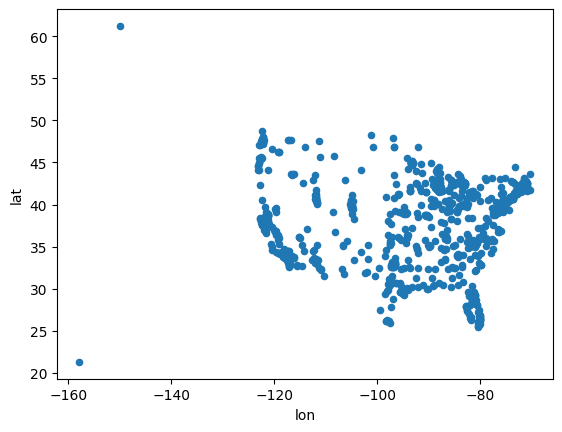

In [69]:
df.plot(x='lon', y='lat', kind='scatter') # вывод графика с точками

In [70]:
df[df['lon'].min() == df['lon']] # поиск города с минимальной долготой

,city,state,population,lat,lon
785,Honolulu,Hawaii,347884,21.306944,-157.858333


In [71]:
df[df['lat'].max() == df['lat']] # поиск города с максимальной широтой

,city,state,population,lat,lon
370,Anchorage,Alaska,300950,61.218056,-149.900278


In [72]:
agg_df = df.groupby(['state']).agg(
    min_lat=pd.NamedAgg(column='lat', aggfunc='min'),
    max_lat=pd.NamedAgg(column='lat', aggfunc='max'),
    min_lon=pd.NamedAgg(column='lon', aggfunc='min'),
    max_lon=pd.NamedAgg(column='lon', aggfunc='max'),
    population=pd.NamedAgg(column='population', aggfunc='sum'),
    cities=pd.NamedAgg(column='city', aggfunc='count')
)
# Выполняем группировку по названию штата
agg_df.head(1)

,min_lat,max_lat,min_lon,max_lon,population,cities
state,,,,,,
Alabama,30.695366,34.79981,-88.039891,-85.000765,1279813,12


In [73]:
agg_df['lat'] = (agg_df['max_lat'] + agg_df['min_lat']) / 2
agg_df['lon'] = (agg_df['max_lon'] + agg_df['min_lon']) / 2
agg_df.head()

,min_lat,max_lat,min_lon,max_lon,population,cities,lat,lon
state,,,,,,,,
Alabama,30.695366,34.799810,-88.039891,-85.000765,1279813,12,32.747588,-86.520328
Alaska,61.218056,61.218056,-149.900278,-149.900278,300950,1,61.218056,-149.900278
Arizona,31.545500,35.198284,-114.627692,-110.277286,4691466,25,33.371892,-112.452489
Arkansas,34.228431,36.372854,-94.398548,-90.704279,787011,10,35.300643,-92.551413
California,32.640054,40.586540,-122.714055,-115.498883,27910620,212,36.613297,-119.106469


In [74]:
agg_df = agg_df.drop(['min_lat', 'min_lon', 'max_lat', 'max_lon'], axis=1)
# удаляем столбцы
agg_df.head(1)

,population,cities,lat,lon
state,,,,
Alabama,1279813,12,32.747588,-86.520328


In [75]:
agg_df['density'] = agg_df['population'] / agg_df['cities']
agg_df.head(1)

,population,cities,lat,lon,density
state,,,,,
Alabama,1279813,12,32.747588,-86.520328,106651.083333


<AxesSubplot: xlabel='lon', ylabel='lat'>

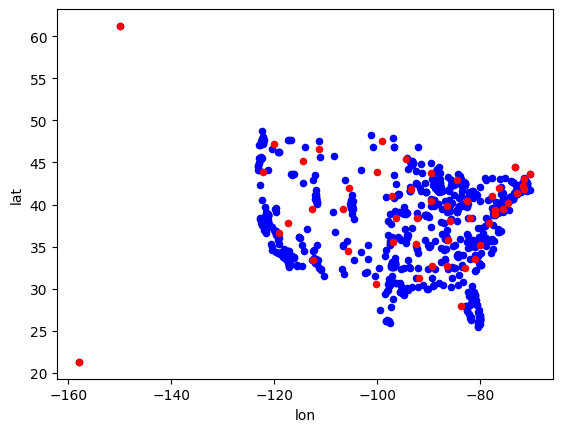

In [76]:
ax = df.plot(x='lon', y='lat', kind='scatter', c='Blue')
agg_df.plot(x='lon', y='lat', kind='scatter', c='Red', ax=ax)